<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/KNN_(IRIS_DATA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#iris_data 불러오기
iris = load_iris()

In [ ]:
# iris['target']
# iris['data']
# print(iris.keys())
# print(iris['data']) # feature 데이터
#print(iris['target']) traget 데이터
#print(iris['DESCR'])
#print(iris['target_names'])
#print(iris['feature_names'])
#print(iris['data'].shape)

In [ ]:
# feature = 4개 확인
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# Class 가 3개로 이루어진것을 확인
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# 150 x 4 배열의 데이터 shape을 확인
iris['data'].shape

(150, 4)

In [ ]:
# trian 데이트셋과 test셋을 split하여 구성한다. 
x_train, x_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2)

In [ ]:
# Knn으로 데이터셋과 테스트셋을 학습한다.
# n_neighbors = 5 : 5개의 이웃과의 거리를 기준으로 분류한다는 것을 의미
# p=1 -> 맨하튼 거리
# p=2 -> 유클리드 거리
# minkowski = 맨하튼거리와 유클리드 거리를 일반화 한 것이다. (노션참고-KNN)
############################################################
# 5개의 이웃과의 거리를 기준으로 분류하고, 거리측정을 유클리드로 한다는 의미 #
############################################################
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# test의 Feature에 대한 class를 추정하고, 정확도를 계산한다. 
# accuracy = knn.score(testX, testY)와 동일함.
y_pred = knn.predict(x_test)
accuracy = (y_test == y_pred).mean()
print("시험용 데이터로 측정한 정확도 = %.2f" % accuracy)
print()

# train의 feature에 대한 class를 추정하고, 정확도를 계산한다. 
y_pred = knn.predict(x_train)
accuracy = (y_train == y_pred).mean()
print("학습용 데이터로 측정한 정확도 = %.2f" % accuracy)

시험용 데이터로 측정한 정확도 = 0.97

학습용 데이터로 측정한 정확도 = 0.96


In [ ]:
# K값을 변화시켜가면서 정확도를 측정해 본다.
testAcc = []
trainAcc = []
for k in range(1, 50):
    # KNN 으로 Train 데이터 세트를 학습한다.
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    knn.fit(x_train, y_train)
    
    # Test 세트의 Feature에 대한 정확도
    y_pred = knn.predict(x_test)
    testAcc.append((y_test == y_pred).sum() / len(y_pred))
    
    # Train 세트의 Feature에 대한 정확도
    y_pred = knn.predict(x_train)
    trainAcc.append((y_train == y_pred).sum() / len(y_pred))
print(testAcc)
print()
print(trainAcc)

[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]

[1.0, 0.975, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9666666666666667, 0.975, 0.9666666666666667, 0.975, 0.975, 0.9833333333333333, 0.975, 0.975, 0.975, 0.975, 0.9666666666666667, 0.975, 0.975, 0.975, 0.975, 0.975, 0.95, 0.9666666666666667, 0.95, 0.9416666666666667, 0.9416666666666667, 0.9333333333333333, 0.925, 0.925, 0.9166666666666666, 0.9416666666666667, 0.9333333333333333, 0.933

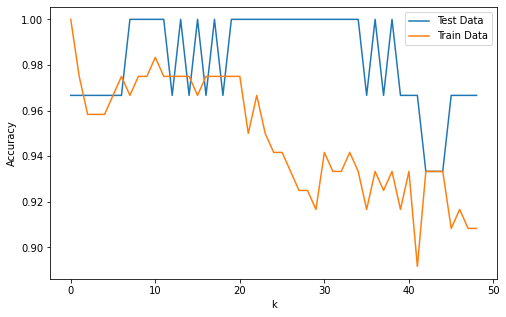

In [ ]:
# K값에 변화를 준 정확도를 그래프로 나타내본다. 
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(testAcc, label="Test Data")
plt.plot(trainAcc, label="Train Data")
plt.legend()
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

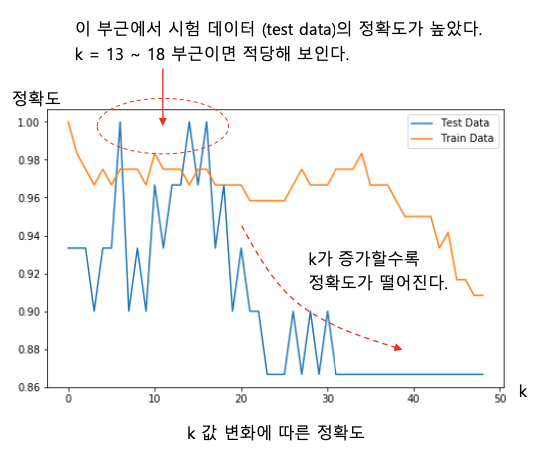